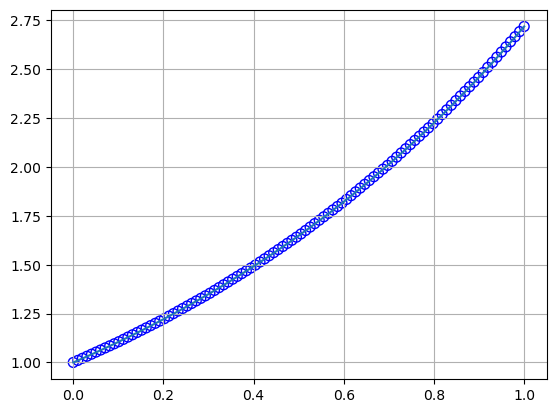

C:\Users\ajpat\AppData\Local\Temp\ipykernel_9964\3842959210.py:40: RuntimeWarning: divide by zero encountered in log10
  err = np.log10(np.abs(yeval-fex))


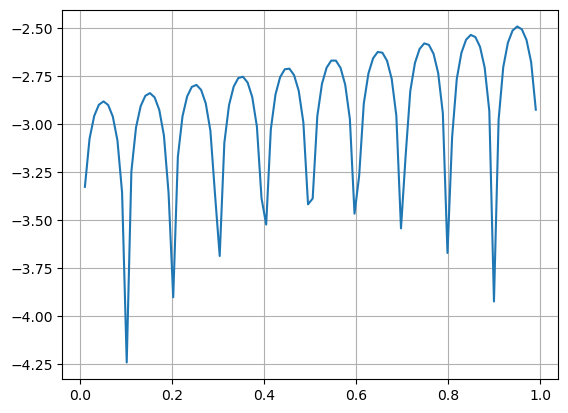

In [36]:

import numpy as np
import math
from numpy.linalg import inv 
import matplotlib.pyplot as plt

def interpolate(x0,y0,x1,y1,alpha):
    m = (y1-y0)/(x1-x0)
    y = m*(alpha-x0) + y0
    return y

def  eval_lin_spline(xeval,Neval,a,b,f,Nint):

    '''create the intervals for piecewise approximations'''
    xint = np.linspace(a,b,Nint+1)
   
    '''create vector to store the evaluation of the linear splines'''
    yeval = np.zeros(Neval) 
            #'''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        #'''let ind denote the indices in the intervals'''
        #'''let n denote the length of ind'''
        
        #'''temporarily store your info for creating a line in the interval of 
         #interest'''

            #'''use your line evaluator to evaluate the lines at each of the points 
           #in the interval'''
           #'''yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with 
           #the points (a1,fa1) and (b1,fb1)'''
    
    for jint in range(Nint):
         a1= xint[jint]
         fa1 = f(a1)
         b1 = xint[jint+1]
         fb1 = f(b1)
         ind= np.where((xeval >= a1) & (xeval <= b1))
         n = len(ind)
         for kk in range(n):
             yeval[ind[kk]] = interpolate(a1,fa1,b1,fb1,xeval[ind[kk]])
            
    return(yeval)

def driver():
    
    f = lambda x: math.exp(x)
    a = 0
    b = 1
    
    ''' create points you want to evaluate at'''
    Neval = 100
    xeval =  np.linspace(a,b,Neval)
    
    ''' number of intervals'''
    Nint = 10
    
    '''evaluate the linear spline'''
    yeval = eval_lin_spline(xeval,len(xeval),a,b,f,Nint)
    
    ''' evaluate f at the evaluation points'''
    fex = np.zeros(Neval)
    for j in range(Neval):
        fex[j] = f(xeval[j]) 

    
    plt.figure()
    plt.plot(xeval,fex)
    plt.scatter(xeval,yeval,facecolors='none', edgecolors='blue', s=50)
    plt.grid()
    plt.show()   
     
    plt.figure()
    err = np.log10(np.abs(yeval-fex))
    plt.plot(xeval,err)
    plt.grid()
             

    
    
def  eval_lin_spline(xeval,Neval,a,b,f,Nint):

    '''create the intervals for piecewise approximations'''
    xint = np.linspace(a,b,Nint+1)
   
    '''create vector to store the evaluation of the linear splines'''
    yeval = np.zeros(Neval) 
            #'''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        #'''let ind denote the indices in the intervals'''
        #'''let n denote the length of ind'''
        
        #'''temporarily store your info for creating a line in the interval of 
         #interest'''

            #'''use your line evaluator to evaluate the lines at each of the points 
           #in the interval'''
           #'''yeval(ind(kk)) = call your line evaluator at xeval(ind(kk)) with 
           #the points (a1,fa1) and (b1,fb1)'''
    
    for jint in range(Nint):
         a1= xint[jint]
         fa1 = f(a1)
         b1 = xint[jint+1]
         fb1 = f(b1)
         ind= np.where((xeval >= a1) & (xeval <= b1))
         n = len(ind)
         for kk in range(n):
             yeval[ind[kk]] = interpolate(a1,fa1,b1,fb1,xeval[ind[kk]])
            
    return(yeval)
           
           

driver()               


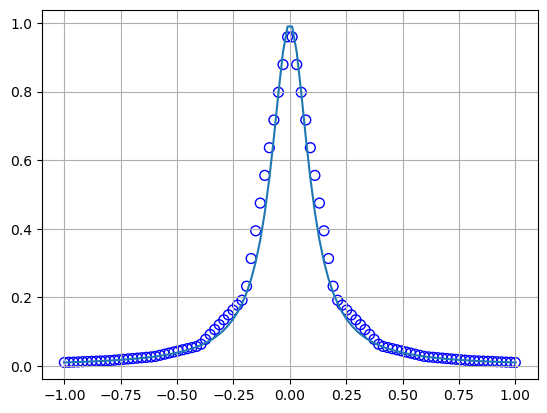

C:\Users\ajpat\AppData\Local\Temp\ipykernel_9964\3129983625.py:29: RuntimeWarning: divide by zero encountered in log10
  err = np.log10(np.abs(yeval-fex))


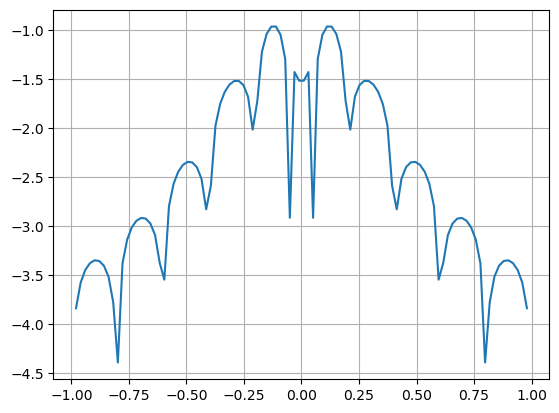

In [39]:
f = lambda x: 1/(1+(10*x)**2)

a = -1
b = 1
    
    #''' create points you want to evaluate at'''
Neval = 100
xeval =  np.linspace(a,b,Neval)
    
    #''' number of intervals'''
Nint = 10
    
    #'''evaluate the linear spline'''
yeval = eval_lin_spline(xeval,len(xeval),a,b,f,Nint)
    
    #''' evaluate f at the evaluation points'''
fex = np.zeros(Neval)
for j in range(Neval):
    fex[j] = f(xeval[j]) 

    
plt.figure()
plt.plot(xeval,fex)
plt.scatter(xeval,yeval,facecolors='none', edgecolors='blue', s=50)
plt.grid()
plt.show()   
     
plt.figure()
err = np.log10(np.abs(yeval-fex))
plt.plot(xeval,err)
plt.grid()

In [ ]:
def driver():

    def f(x):
        return np.exp(x);

    a = 0;
    b = 1;

    ''' number of intervals'''
    Nint = 3;
    xint = np.linspace(a,b,Nint+1);
    yint = f(xint);

    ''' create points you want to evaluate at'''
    Neval = 100;
    xeval =  np.linspace(xint[0],xint[Nint],Neval+1);

#   Create the coefficients for the natural spline
    (A,B,C) = create_natural_spline(yint,xint,Nint);

#  evaluate the cubic spline
    yeval = eval_cubic_spline(xeval,Neval,xint,Nint,A,B,C);


    ''' evaluate f at the evaluation points'''
    fex = f(xeval)

    nerr = norm(fex-yeval)
    print('nerr = ', nerr)

    plt.figure()
    plt.plot(xeval,fex,'ro-',label='exact function')
    plt.plot(xeval,yeval,'bs--',label='natural spline')
    plt.legend
    plt.show()

    err = abs(yeval-fex)
    plt.figure()
    plt.semilogy(xeval,err,'ro--',label='absolute error')
    plt.legend()
    plt.show()

def create_natural_spline(yint,xint,N):

#    create the right  hand side for the linear system
    b = np.zeros(N-1);
#  vector values
    h = np.zeros(N);
    h[0] = xint[1]-xint[0]
    for i in range(1,N):
       h[i] = xint[i+1] - xint[i]
       b[i-1] = ((yint[i+1]-yint[i])/h[i] - (yint[i]-yint[i-1])/h[i-1])/(h[i-1]+h[i]);

#  create the matrix M so you can solve for the A values
    M = np.zeros((N-1,N-1));
    for i in np.arange(N-1):
        M[i,i] = 4/12;

        if i<(N-2):
            M[i,i+1] = h[i+1]/(6*(h[i]+h[i+1]));

        if i>0:
            M[i,i-1] = h[i]/(6*(h[i]+h[i+1]));

# Solve system M*A = b to find coefficients (a[1],a[2],...,a[N-1]).
    A = np.zeros(N+1);
    A[1:N] = np.linalg.solve(M,b)

#  Create the linear coefficients
    B = np.zeros(N)
    C = np.zeros(N)
    for j in range(N):
       B[j] = # find the C coefficients
       C[j] = # find the D coefficients
    return(A,B,C)

def eval_local_spline(xeval,xi,xip,Ai,Aip,B,C):
# Evaluates the local spline as defined in class
# xip = x_{i+1}; xi = x_i
# Aip = A_{i}; Ai = A_{i-1}

    hi = xip-xi;
    yeval =
    return yeval;


def  eval_cubic_spline(xeval,Neval,xint,Nint,A,B,C):

    yeval = np.zeros(Neval+1);

    for j in range(Nint):
        '''find indices of xeval in interval (xint(jint),xint(jint+1))'''
        '''let ind denote the indices in the intervals'''
        atmp = xint[j];
        btmp= xint[j+1];

#   find indices of values of xeval in the interval
        ind= np.where((xeval >= atmp) & (xeval <= btmp));
        xloc = xeval[ind];

# evaluate the spline
        yloc = eval_local_spline(xloc,atmp,btmp,A[j],A[j+1],B[j],C[j])
#   copy into yeval
        yeval[ind] = yloc

    return(yeval)

driver()